<p align="center">
  <img src="01_Logo_HSE_full_rus_CMYK.png" width="150"/>
</p>

# Итоговый проект по курсу "Аналитик данных" (ВШЭ)

### Тема проекта: <br><br>**"Предсказание цены криптовалюты (Time Series)"**

---

**Выполнила:** Шиляева Ольга Геннадьевна <br>
**Год:** 2025

---

# Содержание

1. [Вводная часть](#1.-Вводная-часть)
2. [Сбор и подготовка данных](#2.-Сбор-и-подготовка-данных)
3. [Исследовательский анализ данных (EDA)](#3.-Исследовательский-анализ-данных-EDA)
4. [Формирование выборки](#Формирование-выборки)
5. [Базовые модели прогнозирования](#Базовые-модели-прогнозирования)
6. [Модели машинного обучения](#Модели-машинного-обучения)
7. [Обучение и оценка моделей](#Обучение-и-оценка-моделей)
8. [Итоговый прогноз и визуализация](#Итоговый-прогноз-и-визуализация)
9. [Интерпретация результатов](#Интерпретация-результатов)
10. [Заключение](#Заключение)

# 1. Вводная часть

Рынок криптовалют за последние годы стал очень популярным и привлекает внимание как частных инвесторов, так и крупных компаний. Одной из главных особенностей криптовалют является сильная изменчивость цен: курс может заметно меняться даже в течение одного дня. Поэтому многим интересно уметь предсказывать такие колебания и понимать, какие факторы на них влияют.  

Цель этого проекта — попробовать построить модель, которая сможет предсказывать цену выбранной криптовалюты на основе исторических данных.  

### Задачи проекта
1. Собрать и подготовить данные по ценам криптовалют.  
2. Провести исследовательский анализ данных (посмотреть графики, динамику, проверить сезонность и тренды).  
3. Подготовить признаки, которые могут быть полезны для прогноза.  
4. Построить несколько моделей прогнозирования — от простых до более сложных.  
5. Сравнить качество этих моделей и выбрать ту, которая покажет лучший результат.  
6. Построить прогноз и сделать выводы, насколько такой подход можно использовать на практике.

---

In [153]:
#!pip install yfinance --upgrade

In [154]:
#!pip install --upgrade pip

---

# 2. Сбор и подготовка данных

[Вернуться к содержанию](#Содержание)

In [155]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения графиков и таблиц
plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

# Загрузка данных по Bitcoin (BTC-USD) - все данные с 17.09.2014
# data_out = yf.download("BTC-USD", start="2014-09-17", end="2025-08-17", interval="1d")

# Загрузка данных по Bitcoin (BTC-USD) - возьмем данные с 01.01.2025
data_out = yf.download("BTC-USD", start="2014-09-17", end="2025-08-31", interval="1d")

print("Размер датасета:", data_out.shape)
data_out.head(15)

C:\Users\osh84\AppData\Local\Temp\ipykernel_21652\1911322021.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_out = yf.download("BTC-USD", start="2014-09-17", end="2025-08-31", interval="1d")
[*********************100%***********************]  1 of 1 completed

Размер датасета: (4001, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700


In [156]:
# сохранение датасета для надежности
data_out.to_csv('data_crypto.csv')

In [157]:
# обратная выгрузка сохраненного датасета "data_crypto.csv"
data = pd.read_csv("data_crypto.csv")

display(data.head(15))

# Посмотрим на типы данных
display(data.info())

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
5,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
6,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100
7,2014-09-22,402.1520080566406,406.9159851074219,397.1300048828125,399.1000061035156,24127600
8,2014-09-23,435.7909851074219,441.5570068359375,396.1969909667969,402.0920104980469,45099500
9,2014-09-24,423.2049865722656,436.11199951171875,421.1319885253906,435.7510070800781,30627700


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   4003 non-null   object
 1   Close   4002 non-null   object
 2   High    4002 non-null   object
 3   Low     4002 non-null   object
 4   Open    4002 non-null   object
 5   Volume  4002 non-null   object
dtypes: object(6)
memory usage: 187.8+ KB


None

In [158]:
# Удаляем первые две строки
data = data.drop([0, 1]).reset_index(drop=True)

# Приводим столбец "Price" к формату даты
data.rename(columns={"Price": "Date"}, inplace=True)
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Приводим остальные столбцы к float
for col in ["Close", "High", "Low", "Open", "Volume"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

display(data.head(15))

# Посмотрим на получившиеся типы данных
display(data.info())

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4001 non-null   datetime64[ns]
 1   Close   4001 non-null   float64       
 2   High    4001 non-null   float64       
 3   Low     4001 non-null   float64       
 4   Open    4001 non-null   float64       
 5   Volume  4001 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 187.7 KB


None

In [159]:
# Сохранение очищенного датасета длянадежности
data.to_csv('data_crypto_clear.csv', index=False)

In [160]:
# обратная выгрузка сохраненного датасета "data_crypto_clear.csv"
data = pd.read_csv('data_crypto_clear.csv')

display(data.head(10))
display(data.info())

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4001 non-null   object 
 1   Close   4001 non-null   float64
 2   High    4001 non-null   float64
 3   Low     4001 non-null   float64
 4   Open    4001 non-null   float64
 5   Volume  4001 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 187.7+ KB


None

In [161]:
# Преобразуем формат даты (object) в datetime
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")


In [162]:
# Посмотрим типы данных в датасете и статистические данные
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4001 non-null   datetime64[ns]
 1   Close   4001 non-null   float64       
 2   High    4001 non-null   float64       
 3   Low     4001 non-null   float64       
 4   Open    4001 non-null   float64       
 5   Volume  4001 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 187.7 KB


None

,Date,Close,High,Low,Open,Volume
count,4001,4001.000000,4001.000000,4001.000000,4001.000000,4.001000e+03
mean,2020-03-09 00:00:00,24503.271694,24987.421386,23943.375428,24477.318038,2.046297e+10
min,2014-09-17 00:00:00,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2017-06-13 00:00:00,2464.580078,2537.159912,2332.989990,2446.239990,1.043740e+09
50%,2020-03-09 00:00:00,10233.900391,10434.922852,9946.675781,10230.365234,1.641803e+10
75%,2022-12-04 00:00:00,38794.972656,39835.140625,37629.359375,38794.464844,3.187828e+10
max,2025-08-30 00:00:00,123344.062500,124457.117188,118959.195312,123339.398438,3.509679e+11
std,NaN,29047.501726,29547.562853,28470.604638,29020.457632,2.180934e+10


---
---

# 3. Исследовательский анализ данных EDA

[Вернуться к содержанию](#Содержание)

### Исследовательский анализ данных (EDA)

**Exploratory Data Analysis (EDA)** — это этап, на котором изучаются и описываются данные, чтобы лучше понять их структуру, особенности и возможные закономерности.  

Для чего нужен EDA:
- Чтобы проверить качество данных (есть ли пропуски, ошибки, выбросы).  
- Чтобы увидеть общие тренды и динамику показателей.  
- Чтобы найти скрытые зависимости и взаимосвязи между признаками.  
- Чтобы выбрать правильные методы моделирования и построения прогнозов.  

EDA включает:
1. Общая статистика — минимум, максимум, средние значения, стандартное отклонение.  
2. Визуализации — графики, которые показывают динамику цен и объёмов торгов.  
3. Распределения — гистограммы и boxplot, чтобы понять, где сосредоточены основные значения.  
4. Аномалии и выбросы — резкие скачки цен или объёмов, которые могут сильно влиять на модель.  
5. Связи между переменными — корреляции между Open, High, Low, Close и Volume.  
6. Сезонность и тренды — проверка, есть ли повторяющиеся паттерны (например, рост в определённые месяцы).  

В реализации Проекта будут использоваться:
- Статистические методы: describe(), корреляции.  
- Графики:  
  - линейные (динамика цен),  
  - гистограммы (распределение цен и доходностей),  
  - boxplot (распределения и выбросы),  
  - тепловая карта корреляций.  
- Методы анализа временных рядов: автокорреляция, сезонность.  

Это необходимо, чтобы:
- понять данные до начала моделирования.  
- заранее выявить потенциальные проблемы (аномалии, несбалансированные данные).  
- принять решения о том, какие признаки и методы будут полезны при прогнозировании цены криптовалюты.

### Графические визуализации данных о ценах

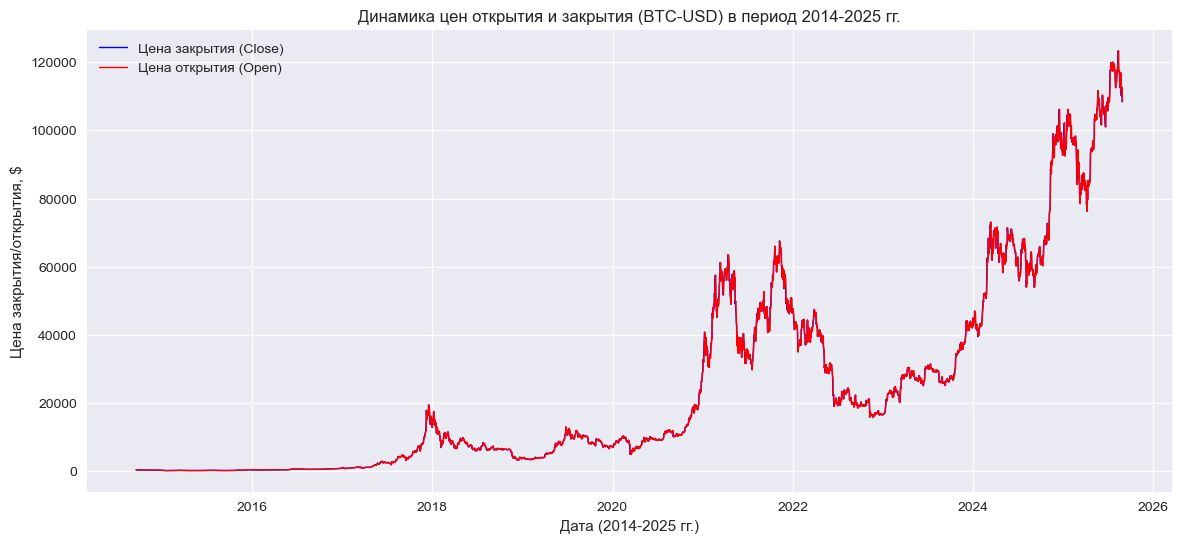

C:\Users\osh84\AppData\Local\Temp\ipykernel_21652\1940960881.py:22: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  x = mdates.date2num(data["Date"].dt.to_pydatetime())


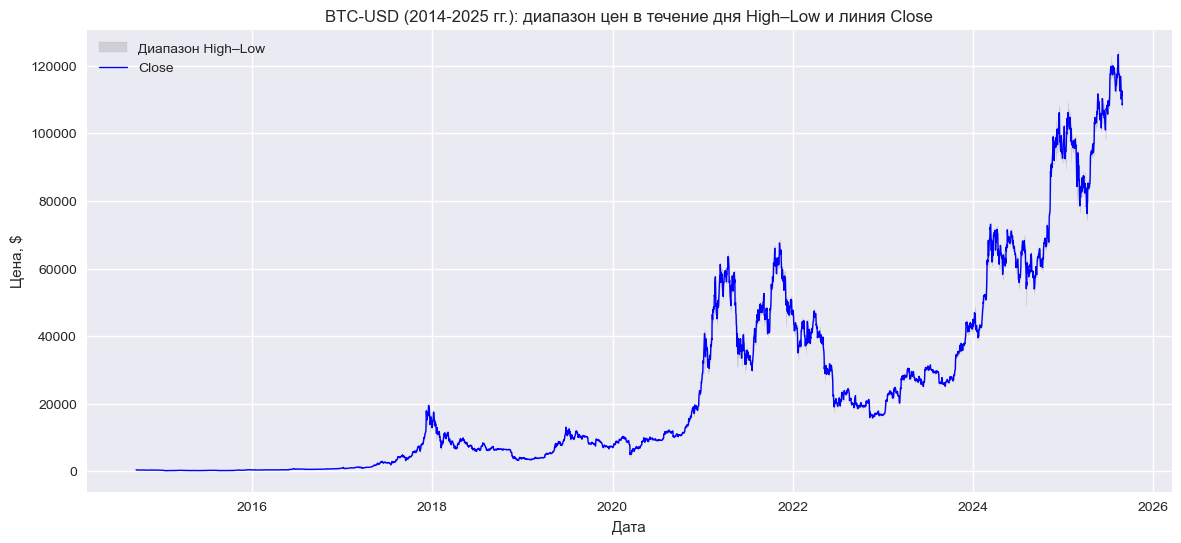

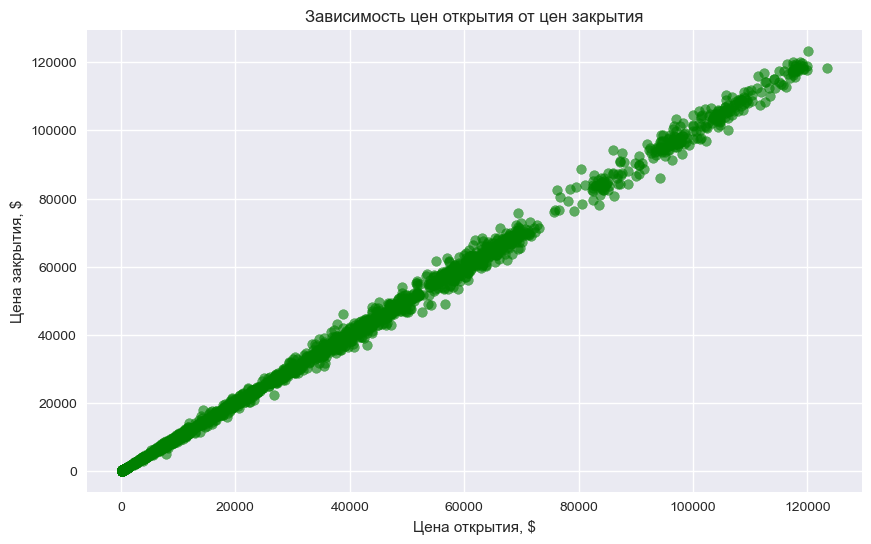

In [163]:
# Построим линейный график цены закрытия в период 2014-2025 гг.

plt.figure(figsize=(14, 6))

# Линия цены закрытия
plt.plot(data["Date"], data["Close"], label="Цена закрытия (Close)", color="blue", linewidth=1)

# Линия цены открытия
plt.plot(data["Date"], data["Open"], label="Цена открытия (Open)", color="red", linewidth=1)

plt.title("Динамика цен открытия и закрытия (BTC-USD) в период 2014-2025 гг.")
plt.xlabel("Дата (2014-2025 гг.)")
plt.ylabel("Цена закрытия/открытия, $")
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.dates as mdates

# Диапазон High–Low + линия Close
# -------------------------------
x = mdates.date2num(data["Date"].dt.to_pydatetime())
plt.figure(figsize=(14, 6))
plt.fill_between(x, data["Low"].values, data["High"].values, 
                 alpha=0.25, label="Диапазон High–Low", color="gray")    # волатильность цен в течение дня
plt.plot(x, data["Close"].values, linewidth=1, label="Close", color="blue")
plt.gca().xaxis_date()
plt.title("BTC-USD (2014-2025 гг.): диапазон цен в течение дня High–Low и линия Close")
plt.xlabel("Дата")
plt.ylabel("Цена, $")
plt.legend()
plt.grid(True)
plt.show()

# # Распределение цен закрытия
# plt.figure(figsize=(6,6))
# sns.boxplot(y=data["Close"], color="violet")
# plt.title("Распределение цен закрытия (Boxplot)")
# plt.ylabel("Цена закрытия, $")
# plt.grid(True, axis="y")
# plt.show()

# Зависимость цены закрытия от цены открытия
plt.figure(figsize=(10,6))
plt.scatter(data["Open"], data["Close"], alpha=0.6, color="green")
plt.title("Зависимость цен открытия от цен закрытия")
plt.xlabel("Цена открытия, $")
plt.ylabel("Цена закрытия, $")
plt.grid(True)
plt.show()

### Графические визуализации объемов торгов

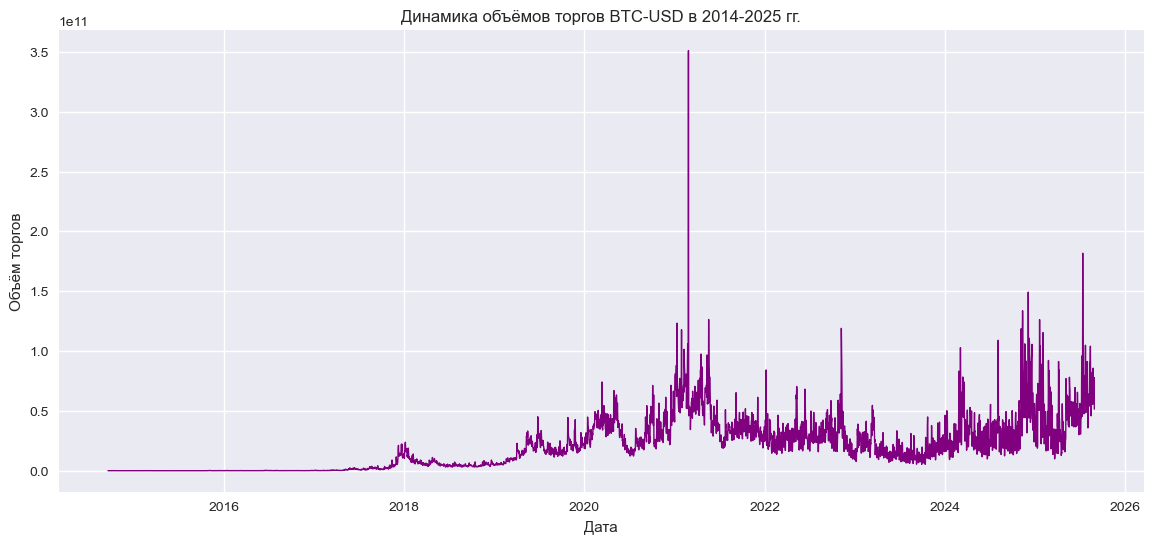

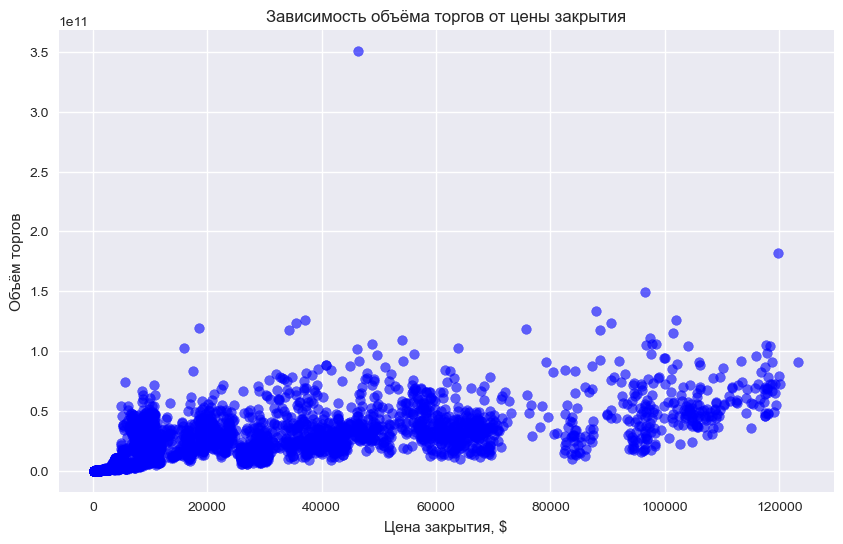

In [164]:
# --- 1) Линейный график объемов ---
plt.figure(figsize=(14,6))
plt.plot(data["Date"], data["Volume"], color="purple", linewidth=1)
plt.title("Динамика объёмов торгов BTC-USD в 2014-2025 гг.")
plt.xlabel("Дата")
plt.ylabel("Объём торгов")
plt.grid(True)
plt.show()

# # --- 2) Boxplot ---
# plt.figure(figsize=(6,6))
# sns.boxplot(y=data["Volume"], color="orange")
# plt.title("Распределение объёмов торгов (Boxplot)")
# plt.ylabel("Объём торгов")
# plt.grid(True, axis="y")
# plt.show()

# --- 3) Scatter Volume vs Close ---
plt.figure(figsize=(10,6))
plt.scatter(data["Close"], data["Volume"], alpha=0.6, color="blue")
plt.title("Зависимость объёма торгов от цены закрытия")
plt.xlabel("Цена закрытия, $")
plt.ylabel("Объём торгов")
plt.grid(True)
plt.show()

---
---

Для начала исследовательского анализа данных (EDA) сделаем три базовые визуализации:<br>
1.	Распределение цен закрытия (Close) — гистограмма + KDE.<br>
2.	Распределение дневной доходности (returns).<br>
3.	Корреляции между признаками (Open, High, Low, Close, Volume) — тепловая карта.

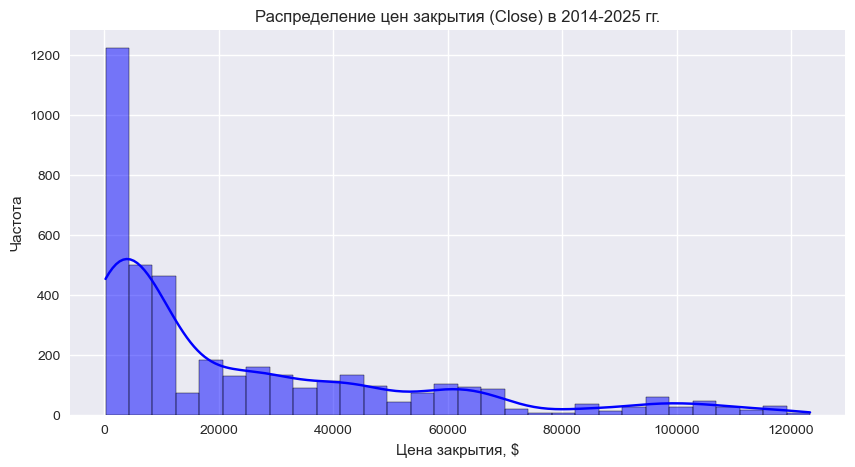

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Распределение цен закрытия ---
plt.figure(figsize=(10,5))
sns.histplot(data["Close"], bins=30, kde=True, color="blue")
plt.title("Распределение цен закрытия (Close) в 2014-2025 гг.")
plt.xlabel("Цена закрытия, $")
plt.ylabel("Частота")
plt.grid(True)
plt.show()



**Анализ визуализации "Распределение цен закрытия (Close) в 2014-2025 гг."**:<br>
Сильная асимметрия распределения (правосторонний “длинный хвост”)
Большая часть цен закрытия сосредоточена в диапазоне до $20 000, но встречаются и очень высокие значения (до $120 000), что растягивает распределение вправо.

Основная масса наблюдений — низкие значения
Самая высокая частота наблюдается при закрытиях до $10 000. Это характерно для ранних лет наблюдений (2014–2016 гг.), когда стоимость криптовалюты была низкой.

Редкие, но значимые всплески на высоких уровнях.

На графике видны небольшие «пики» в районе 20 000, 40 000, 60 000 $$ и выше. Это отражает исторические «бычьи» циклы и рост стоимости криптовалюты в 2017, 2021 и 2024 годах.

График демонстрирует высокую волатильность
Большой разброс цен и «тяжёлый хвост» указывают на резкие изменения стоимости — типичное свойство криптовалютных активов.

**Итог**: распределение цен закрытия криптовалюты крайне неравномерное, с доминированием низких значений и редкими, но высокими скачками, что подчёркивает спекулятивный характер рынка.

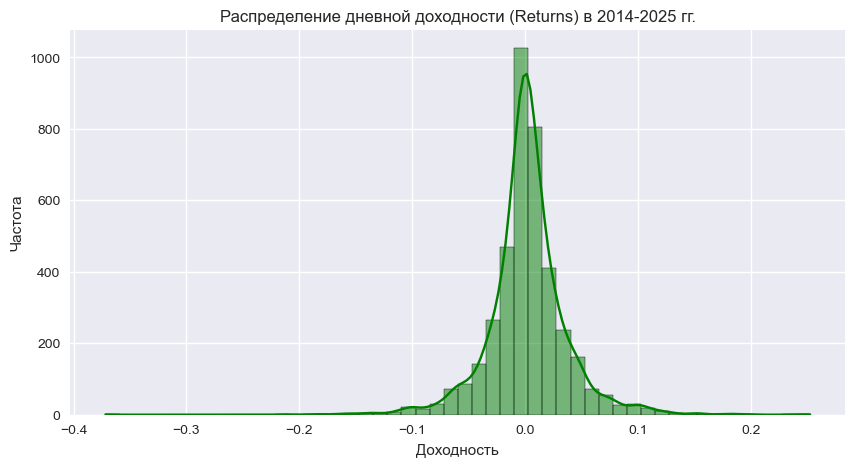

In [166]:
# --- 2) Распределение доходности ---
data["Returns"] = data["Close"].pct_change()  # дневная доходность
plt.figure(figsize=(10,5))
sns.histplot(data["Returns"].dropna(), bins=50, kde=True, color="green")
plt.title("Распределение дневной доходности (Returns) в 2014-2025 гг.")
plt.xlabel("Доходность")
plt.ylabel("Частота")
plt.grid(True)
plt.show()



Дневная доходность (Returns) показывает, насколько изменилась цена закрытия актива по сравнению с предыдущим днём.

Она рассчитывается как относительное изменение цены:
$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $.<br>


**Анализ визуализации "Распределение дневной доходности (Returns) в 2014-2025 гг."**:<br>
1.	Центр около нуля<br>
•	Большинство значений доходности сосредоточено рядом с 0%.<br>
•	Это нормально: в большинстве дней цена сильно не меняется.<br>
2.	Форма распределения<br>
•	График напоминает «колокол» (нормальное распределение), но с особенностями:<br>
•	у него более высокие пики в центре;<br>
•	«толстые хвосты» — больше крайних значений, чем у обычной нормальной кривой.<br>
3.	Выбросы<br>
•	Есть дни с изменением цены на ±7–10%, что говорит о резких скачках рынка (всплески волатильности).<br>
<br>
**Вывод:**<br>
	•	Распределение доходностей не идеально нормальное: оно суженное в центре и имеет толстые хвосты.<br>
	•	Это типично для финансовых временных рядов: большинство изменений небольшие, но иногда случаются сильные движения.<br>
	•	Для анализа и прогнозирования важно учитывать такие скачки — простая модель «среднее + нормальное распределение» будет недооценивать риск.<br>

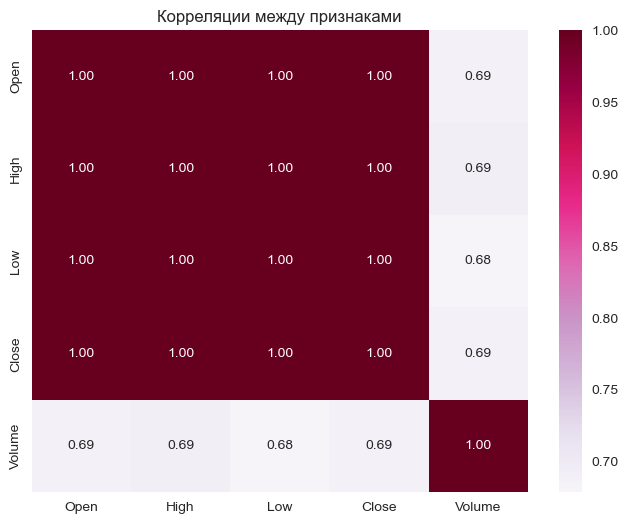

In [167]:
# --- 3) Корреляции между признаками ---
plt.figure(figsize=(8,6))
sns.heatmap(data[["Open","High","Low","Close","Volume"]].corr(),
            annot=True, cmap="PuRd", fmt=".2f")
plt.title("Корреляции между признаками")
plt.show()

**Анализ визуализации "Корреляции между признаками"**:<br>
1.	Сильная корреляция между ценовыми признаками:<br>
	•	Open, High, Low, Close имеют коэффициенты корреляции ~0.98–1.00.<br>
	•	Это ожидаемо: все они отражают одну и ту же динамику цены в течение дня.<br>
2.	Объём торгов (Volume) коррелирует слабо:<br>
	•	Volume имеет среднюю корреляцию с ценами: ~0.42–0.53.<br>
	•	Это значит, что объёмы не всегда напрямую связаны с уровнем цен. Иногда высокий объём сопровождается ростом, иногда падением.<br>
3.	Практическое значение для анализа:<br>
	•	В модели нет смысла одновременно использовать все четыре ценовых признака (Open, High, Low, Close), т.к. они дают почти одинаковую информацию → это приведёт к мультиколлинеарности. Целесообразнее выбрать один признак.<br>
	•	Volume может добавить ценную информацию, т.к. несёт другую динамику.<br>
<br>
**Вывод:**<br>
	•	Ценовые признаки (Open, High, Low, Close) сильно дублируют друг друга.<br>
	•	Для прогнозирования цены можно оставить только Close.<br>
	•	Volume стоит проанализировать отдельно — он может быть полезным дополнительным индикатором, особенно при поиске паттернов волатильности и «объёмных аномалий».<br>


### Проверим корреляцию цен закрытия биткойна с другими активами: золото, нефть, индийская рупия

In [168]:
# Выгрузка данных о золоте, индийской рупии, нефти.
# данные берем за тот же период и с таким же датафреймом как в нашем очищенном датасете (2025 год, день).
# далее - графическая проверка корреляции

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1) Базовый BTC-датасет (в 2014-2025 гг., дневной) ===
btc = pd.read_csv("data_crypto_clear.csv", parse_dates=["Date"])
btc = btc.sort_values("Date").reset_index(drop=True)
btc_2025 = btc[(btc["Date"] >= "2014-09-17") & (btc["Date"] <= "2025-12-31")].copy()

start_date = btc_2025["Date"].min()
end_date   = btc_2025["Date"].max()

# === 2) Скачиваем активы одним вызовом ===
tickers = {
    "Gold": "GC=F",   # золото (фьючерсы)
    "Oil" : "CL=F",   # нефть WTI (фьючерсы)
    "INR" : "INR=X",  # USD/INR (рост = ослабление рупии)
}
raw = yf.download(list(tickers.values()),
                  start=start_date, end=end_date, interval="1d",
                  progress=False, group_by="column")

# Вытаскиваем "Close" корректно для случая MultiIndex-колонок
# (при нескольких тикерах yfinance делает столбцы с уровнями)
if isinstance(raw.columns, pd.MultiIndex):
    close_assets = raw["Close"].copy()
else:
    # на всякий случай, если вдруг вернулся одиночный уровень
    close_assets = raw[["Close"]].copy()

# Переименовываем колонки на удобные имена
close_assets = close_assets.rename(columns={v: k for k, v in tickers.items()})

# Индекс -> столбец Date, убираем TZ, сортируем
close_assets = close_assets.copy()
close_assets.index = pd.to_datetime(close_assets.index)
# если индекс вдруг TZ-aware, обнулим таймзону
try:
    close_assets.index = close_assets.index.tz_localize(None)
except Exception:
    pass
close_assets = close_assets.sort_index().reset_index().rename(columns={"index": "Date"})

# === 3) Собираем единый датафрейм по датам ===
btc_close = btc_2025[["Date", "Close"]].rename(columns={"Close": "BTC"})
merged = btc_close.merge(close_assets, on="Date", how="inner")

print("Диапазон дат:", merged["Date"].min().date(), "—", merged["Date"].max().date())
display(merged.head(15))
display(merged.info())

Диапазон дат: 2014-09-17 — 2025-08-29


C:\Users\osh84\AppData\Local\Temp\ipykernel_21652\1255810541.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(list(tickers.values()),


,Date,BTC,Oil,Gold,INR
0,2014-09-17,457.334015,94.419998,1234.400024,61.053001
1,2014-09-18,424.440002,93.070000,1225.699951,60.908001
2,2014-09-19,394.795990,92.410004,1215.300049,60.689999
3,2014-09-22,402.152008,91.519997,1216.800049,60.853001
4,2014-09-23,435.790985,91.559998,1221.000000,61.000000
5,2014-09-24,423.204987,92.800003,1218.599976,60.980000
6,2014-09-25,411.574005,92.529999,1221.199951,60.810001
7,2014-09-26,404.424988,93.540001,1214.099976,61.490002
8,2014-09-29,375.467010,94.570000,1217.500000,61.138000
9,2014-09-30,386.944000,91.160004,1210.500000,61.553001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2856 non-null   datetime64[ns]
 1   BTC     2856 non-null   float64       
 2   Oil     2755 non-null   float64       
 3   Gold    2754 non-null   float64       
 4   INR     2852 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 111.7 KB


None

**корреляция между признаками получившего датасета**

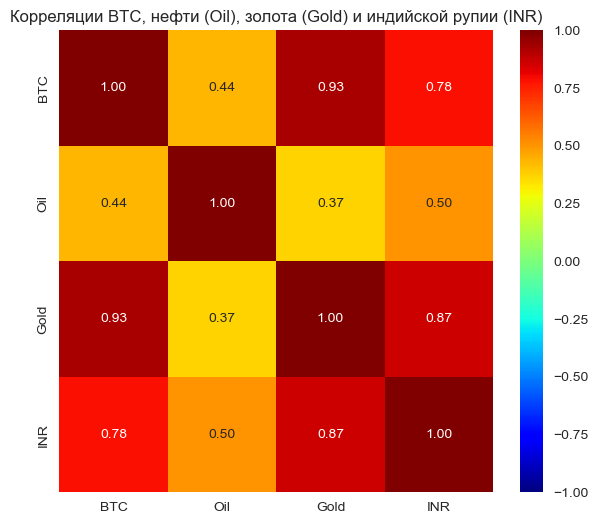

In [169]:
# === Тепловая карта корреляции ===

import seaborn as sns

corr_df = merged.drop(columns='Date')
corr_mat = corr_df.corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="jet", vmin=-1, vmax=1, fmt=".2f")
plt.title("Корреляции BTC, нефти (Oil), золота (Gold) и индийской рупии (INR)")
plt.show()

**Вывод**:<br>
* корреляция между биткойном и нефтью отсутствует => нецелесообразно использовать данные фонды для предсказания.
* достаточно сильная коррелляция между биткойном и золотом => **цены закрытия золота могут быть использованы для предсказания**.
* корреляция между биткойном и рупией слабая => нецелесообразно использовать данные фонды для предсказания.

In [170]:
# Сохранение полученного датасета с ценами закрытия активов
merged.to_csv('data_crypto_founds.csv', index=False)

## Добавим в начальный очищенный датасет расчетные столбцы (идентификаторы) и проверим корреляцию цен закрытия биткойна с идентификаторами

*Будем использовать наиболее популярные идентификаторы: SMA, MACD, ATR*

## Скользящие средние SMA(50) и SMA(200)

**SMA (Simple Moving Average)** — простое скользящее среднее, один из ключевых индикаторов технического анализа, используемый для выявления направления тренда и сглаживания колебаний цены. В отличие от краткосрочных SMA, долгосрочные средние позволяют увидеть общую тенденцию рынка.

SMA рассчитывается как среднее арифметическое цен закрытия (или других выбранных цен) за фиксированное число последних периодов. В случае SMA(50) берётся 50 последних дней (свечей) и вычисляется среднее значение:.
$$
\mathrm{SMA}_n(t)=\frac{1}{n}\sum_{i=0}^{n-1} \mathrm{Close}_{t-i}
$$

* SMA(50) отражает среднесрочный тренд (около 2,5 месяца торговых дней).
* SMA(200) показывает долгосрочную тенденцию (около 10 месяцев торговых дней).

В исследовании SMA(50) и SMA(200) включены как признаки (идентификаторы), отражающие одновременно краткосрочные и долгосрочные тенденции цены биткойна. Их совместное использование позволяет модели учитывать не только последние изменения, но и более устойчивую динамику рынка, что может повысить точность прогнозирования цены закрытия.

Он помогает учесть среднесрочную динамику рынка и может быть полезен для выявления текущего направления тренда, а также в комбинации с другими индикаторами (например, MACD).

---

## MACD (12, 26, 9)

**MACD (Moving Average Convergence Divergence)** — индикатор технического анализа, который измеряет расхождение и схождение двух экспоненциальных скользящих средних (EMA) с разными периодами. Он помогает выявлять силу и направление тренда, а также возможные моменты его разворота.

MACD состоит из трёх компонентов:
1. Линия MACD — разница между короткой EMA и длинной EMA:
$$
\mathrm{MACD}_t=\mathrm{EMA}_{12}(t)-\mathrm{EMA}_{26}(t),\qquad
$$
2. Сигнальная линия — сглаженное значение MACD за 9 периодов:
$$
\mathrm{Signal}_t=\mathrm{EMA}_9(\mathrm{MACD})_t,
$$
3. Гистограмма — разница между линией MACD и сигнальной линией:
$$
\mathrm{Histogram}_t=\mathrm{MACD}_t-\mathrm{Signal}_t.
$$

В проекте используется MACD (12, 26, 9):
* EMA(12) отражает краткосрочную динамику цены,
* EMA(26) — более долгосрочную тенденцию,
* EMA(9) по линии MACD выступает фильтром сигналов.<br><br>
MACD служит важным признаком, так как он сочетает в себе свойства как трендового индикатора, так и осциллятора, что делает его универсальным инструментом для анализа криптовалютного рынка.

---

## ATR (Average True Range, 14)

**ATR (Average True Range)** — индикатор технического анализа, используемый для измерения волатильности рынка, то есть средней амплитуды колебаний цены за определённый период. ATR не показывает направление тренда (рост или падение), а отражает только силу и интенсивность движений.



1. Сначала вычисляется Истинный диапазон (True Range, TR) для каждого дня:
$$
\mathrm{TR}_t=\max\Big(
\mathrm{High}_t-\mathrm{Low}_t,\;
|\mathrm{High}_t-\mathrm{Close}_{t-1}|,\;
|\mathrm{Low}_t-\mathrm{Close}_{t-1}|
\Big),
$$
где
* $\mathrm{High}_t$ — максимум дня,
* $\mathrm{Low}_t$ — минимум дня,
* $\mathrm{Close}_{t-1}$ — цена закрытия предыдущего дня.

2. Далее рассчитывается средний истинный диапазон (ATR) за 𝑛 периодов (в нашем случае 𝑛=14) с помощью скользящего среднего:
$$
\mathrm{ATR}_n(t)=\mathrm{SMA}_n(\mathrm{TR})_t.
$$

В своем исследовании ATR(14) использую для характеристики волатильности цены биткойна. Этот индикатор помогает учитывать не только направление движения, но и «силу» колебаний рынка. При прогнозировании цен он может быть полезен как дополнительный признак, отражающий фазу рынка — спокойную или турбулентную.

In [171]:
# выгрузим сохраненный очищенный датасет 'data_crypto_clear.csv'
data = pd.read_csv('data_crypto_clear.csv')

# Преобразуем формат даты (object) в datetime и остальные форматы в числовые
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

for c in ["Open","High","Low","Close","Volume"]:
    data[c] = pd.to_numeric(data[c], errors="coerce")

display(data.head(10))

# Посмотрим типы данных в датасете и статистические данные
display(data.info())
display(data.describe())

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4001 non-null   datetime64[ns]
 1   Close   4001 non-null   float64       
 2   High    4001 non-null   float64       
 3   Low     4001 non-null   float64       
 4   Open    4001 non-null   float64       
 5   Volume  4001 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 187.7 KB


None

,Date,Close,High,Low,Open,Volume
count,4001,4001.000000,4001.000000,4001.000000,4001.000000,4.001000e+03
mean,2020-03-09 00:00:00,24503.271694,24987.421386,23943.375428,24477.318038,2.046297e+10
min,2014-09-17 00:00:00,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2017-06-13 00:00:00,2464.580078,2537.159912,2332.989990,2446.239990,1.043740e+09
50%,2020-03-09 00:00:00,10233.900391,10434.922852,9946.675781,10230.365234,1.641803e+10
75%,2022-12-04 00:00:00,38794.972656,39835.140625,37629.359375,38794.464844,3.187828e+10
max,2025-08-30 00:00:00,123344.062500,124457.117188,118959.195312,123339.398438,3.509679e+11
std,NaN,29047.501726,29547.562853,28470.604638,29020.457632,2.180934e+10


In [172]:
# ======== расчет и добавление индикаторов ========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = data.copy()

# (опционально) ограничить показ последними N днями для наглядности
# N = 180
# df = df.tail(N).reset_index(drop=True)

# ---- 1) Индикаторы ----

# 1.1) SMA 10/100
df["SMA_50"]  = df["Close"].rolling(window=50,  min_periods=1).mean()
df["SMA_200"] = df["Close"].rolling(window=200, min_periods=1).mean()

# 1.2) MACD (12, 26, 9)
ema12 = df["Close"].ewm(span=12, adjust=False).mean()
ema26 = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = ema12 - ema26
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["MACD_hist"] = df["MACD"] - df["MACD_signal"]

# 1.3) ATR (Average True Range, 14)
atr_window = 14
df["H-L"] = df["High"] - df["Low"]
df["H-C"] = (df["High"] - df["Close"].shift()).abs()
df["L-C"] = (df["Low"]  - df["Close"].shift()).abs()
df["TR"]  = df[["H-L","H-C","L-C"]].max(axis=1)
df["ATR_14"] = df["TR"].rolling(atr_window, min_periods=1).mean()
# ---- 3) Чистка временных служебных колонок (далее не нужны) ----
df.drop(columns=["L14","H14","H-L","H-C","L-C","TR"], inplace=True, errors="ignore")

df.head(15)

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200,MACD,MACD_signal,MACD_hist,ATR_14
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,457.334015,457.334015,0.000000,0.000000,0.000000,15.752014
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,440.887009,440.887009,-2.624024,-0.524805,-2.099219,29.991013
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,425.523336,425.523336,-7.014744,-1.822793,-5.191951,34.428335
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,421.368500,421.368500,-9.249402,-3.308115,-5.941288,34.174500
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,416.859003,416.859003,-11.699137,-4.986319,-6.712818,31.188599
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600,414.407837,414.407837,-13.219400,-6.632935,-6.586465,27.621496
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500,417.462572,417.462572,-11.576391,-7.621626,-3.954764,30.155570
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700,418.180374,418.180374,-11.161219,-8.329545,-2.831674,28.258625
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400,417.446333,417.446333,-11.636576,-8.990951,-2.645625,26.680111
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800,416.144199,416.144199,-12.446688,-9.682099,-2.764590,25.504999


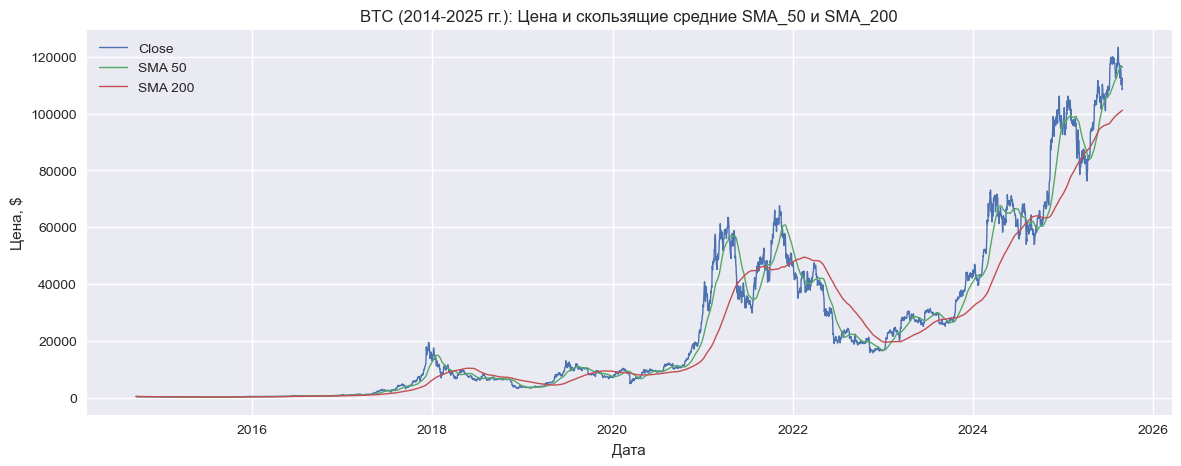

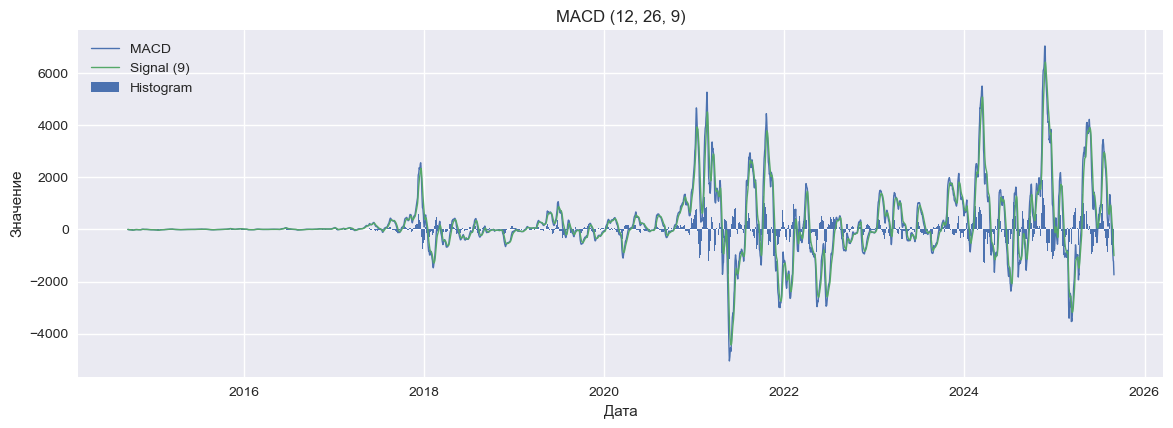

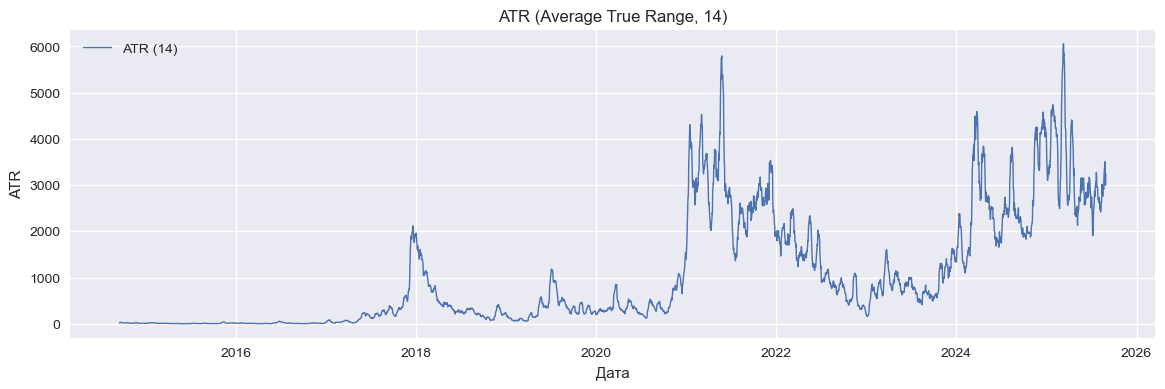

In [175]:
# ---- 2) Визуализации ----
# Стиль и цвета не фиксируем — всё по умолчанию matplotlib.

# 2.1) Цена + SMA(50/200)
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["Close"], linewidth=1, label="Close")
plt.plot(df["Date"], df["SMA_50"], linewidth=1, label="SMA 50")
plt.plot(df["Date"], df["SMA_200"], linewidth=1, label="SMA 200")
plt.title("BTC (2014-2025 гг.): Цена и скользящие средние SMA_50 и SMA_200")
plt.xlabel("Дата"); plt.ylabel("Цена, $")
plt.legend(); plt.grid(True)
plt.show()

# 2.2) MACD (12,26,9)
plt.figure(figsize=(14, 4.5))
plt.plot(df["Date"], df["MACD"], linewidth=1, label="MACD")
plt.plot(df["Date"], df["MACD_signal"], linewidth=1, label="Signal (9)")
plt.bar(df["Date"], df["MACD_hist"], width=1.0, label="Histogram")
plt.title("MACD (12, 26, 9)")
plt.xlabel("Дата"); plt.ylabel("Значение")
plt.legend(); plt.grid(True)
plt.show()

# 2.3) ATR (14)
plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["ATR_14"], linewidth=1, label=f"ATR ({atr_window})")
plt.title("ATR (Average True Range, 14)")
plt.xlabel("Дата"); plt.ylabel("ATR")
plt.legend(); plt.grid(True)
plt.show()

# Готово: df содержит рассчитанные индикаторы, графики выведены.

Корреляции индикаторов с Close:
SMA_50       0.989122
SMA_200      0.960193
ATR_14       0.872792
MACD_hist   -0.024393
Name: Close, dtype: float64


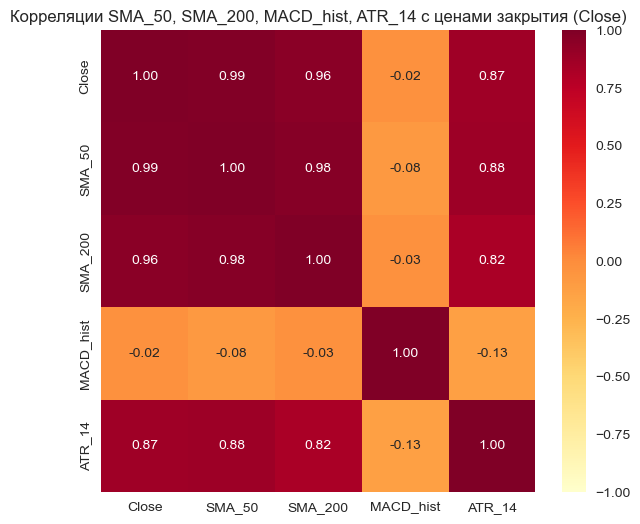

In [176]:
# === Корреляции с Close  ===
features = ["SMA_50","SMA_200","MACD_hist","ATR_14"]
corr_df = df[["Close"] + features].dropna()
corr_close = corr_df.corr().loc[features, "Close"].sort_values(ascending=False)

print("Корреляции индикаторов с Close:")
print(corr_close)

#==============================

# === 3) Тепловая карта (Close + индикаторы) на matplotlib ===
corr_mat = corr_df.corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="YlOrRd", vmin=-1, vmax=1, fmt=".2f")
plt.title("Корреляции SMA_50, SMA_200, MACD_hist, ATR_14 с ценами закрытия (Close)")
plt.show()

**Вывод**: <br>
на тепловой карте видна сильная корреляцая с SMA_50 и SMA_200 => **данные идентификаторы могут быть использованы для предсказания**.